In [4]:
import codecs

# Step 1 - Read Dark BG & Noise
# Read Dark BG
# Open file and read in 'utf-8' encoding
Dark_BG = codecs.open('./RawData/Dark_BG_Noise.txt', mode='r', encoding='utf-8')
# Read as a line
line = Dark_BG.readline()
list_Dark_BG = []
while line:
    a = line.split()
    # Number of lines to be read
    b = a[1:2]
    # Add to the list_Dark_BG
    list_Dark_BG.append(b)
    line = Dark_BG.readline()
Dark_BG.close()

# Read Dark Noise
# Open file and read in 'utf-8' encoding
Dark_Noise = codecs.open('./RawData/Dark_BG_Noise.txt', mode='r', encoding='utf-8')
# Read as a line
line = Dark_Noise.readline()
list_Dark_Noise = []
while line:
    a = line.split()
    # Number of lines to be read
    b = a[2:3]
    # Add to the list_Dark_BG
    list_Dark_Noise.append(b)
    line = Dark_Noise.readline()
Dark_Noise.close()

# Step 2 - Read Sample & BG
# Read Sample1
Sample1 = codecs.open('./RawData/Sample.txt', mode='r', encoding='utf-8')
# Read as a line
line = Sample1.readline()
list_Sample1 = []
while line:
    a = line.split()
    # Number of lines to be read
    # [1:2]-->The 2nd column. [0:1]-->The 1st column 'Wavelength'
    b = a[1:2]
    # Add to the list_Dark_BG
    list_Sample1.append(b)
    line = Sample1.readline()
Sample1.close()

# Read BG1
BG1 = codecs.open('./RawData/BG.txt', mode='r', encoding='utf-8')
# Read as a line
line = BG1.readline()
list_BG1 = []
while line:
    a = line.split()
    # Number of lines to be read
    b = a[1:2]
    # Add to the list_Dark_BG
    list_BG1.append(b)
    line = BG1.readline()
BG1.close()

# Output Test
#for i in list_Dark_BG:
#    print(i)


In [1]:
from numpy import *

### Read line number 'line_count'
count =- 1
for count, line in enumerate(open(r'./RawData/Sample.txt','rU')):
    pass
count += 1
### Check line number
#print(count)

### Creat Matrix 'sam_all' to save all sample data
sam_all = zeros((count,7),dtype=float)
# print(sam_all)

### Create Matrix 'sam_raw' to load txt
sam_raw = open('./RawData/Sample.txt')



### str-->float
def str2num(string):
    try:
        
        ### Scientific counting  "1.23E-04"
        temp = string.split('-')
        
        base, index = temp[0], temp[1]
        base = base.split('E')[0]
        
        return float(base) * (10 ** -(int(index)))
    
    ### if not scientific counting
    except:
        return float(string)
                              



### Read all data to a list 'lines'
lines = sam_raw.readlines()

### From row 1, row 0 is "Wave, sam1 ..."  
sam_all_row = 1
for line in lines:

    ### Processing data line by line
    ### strip means remove the "\n" from the beginning and end
    ### split means splitting rows of data with spaces
    ### Then the processed row data is returned to the list 'list'
    list = line.strip('\n').split(' ')

    ### Put the processed data into the matrix 'sam_all'
    ### list[0:6]-->data in columns 1-7
    ### -->put into the matrix 'sam_all', row 'sam_all_row' 
    sam_all[sam_all_row:] = list[0:6]

    ### Then read the next line of Matrix 'A'
    sam_all_row += 1
    #print(line)
    
#print(sam_all)


<ipython-input-1-e93f0f59f155>:5: DeprecationWarning: 'U' mode is deprecated
  for count, line in enumerate(open(r'./RawData/Sample.txt','rU')):


ValueError: could not convert string to float: 'Wavelength\tSample1\tSample2\tSample3\tSample4\tSample5\tSample6'

['./Xsec_Output\\Xsec_1.txt', './Xsec_Output\\Xsec_2.txt', './Xsec_Output\\Xsec_3.txt', './Xsec_Output\\Xsec_4.txt', './Xsec_Output\\Xsec_5.txt', './Xsec_Output\\Xsec_6.txt']
Processing File #000...


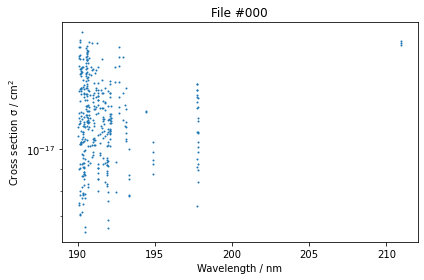

Processing File #001...


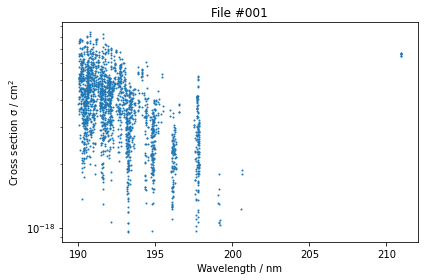

Processing File #002...


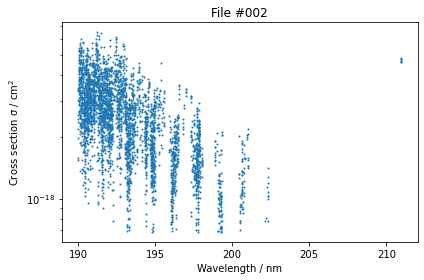

Processing File #003...


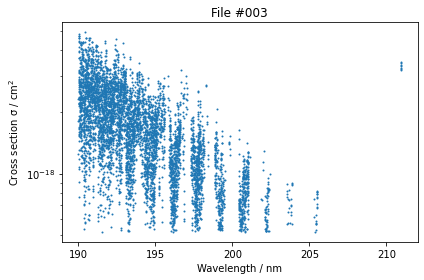

Processing File #004...


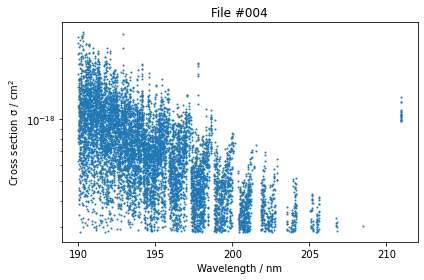

Processing File #005...


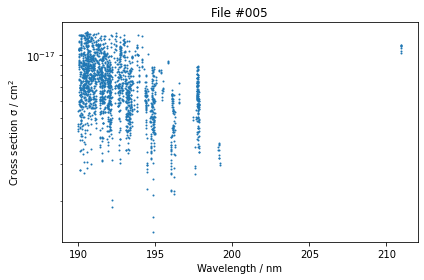

In [111]:
### Spectrum Visualization ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

### READ RAW DATA
### Try numpy.henfromtxt package ###
Dark_BG_Noise = np.genfromtxt('./RawData/Dark_BG_Noise.txt', delimiter='', skip_header=1)
Sample = np.genfromtxt('./RawData/Sample.txt', delimiter='', skip_header=1)
BG = np.genfromtxt('./RawData/BG.txt', delimiter='', skip_header=1)
### check data read
### print 1st row
#print(Dark_BG_Noise[0,:4])
#print(Sample[0,:7])
#print(BG[:,8])
#print(BG)
#print(Sample[:,1])


### WAVELENGTH
Wave = BG[:,0]
### check point: wavelength
#print(Wave)


### NOISE
### BG STANDARD DEVIATION
BG_1 = BG[:,1]
BG_2 = BG[:,2]
BG_3 = BG[:,3]
BG_4 = BG[:,4]
BG_5 = BG[:,5]
BG_6 = BG[:,6]
BG_7 = BG[:,7]
### Check point: BG1 data
#print(BG_1)
### set the box number
n = 20
### calculate number of output matrix rows using input matrix length
#m = len(BG_1) - (n-1)
m = len(BG_1)
### reshape the matrix; ref: https://zhuanlan.zhihu.com/p/64933417
### ***alternative: sliding window view***
### c_1_1 = np.lib.stride_tricks.sliding_window_view(BG_1, 20)
c_1 = np.lib.stride_tricks.as_strided(BG_1, shape=(m,n), strides=(64,64))
c_2 = np.lib.stride_tricks.as_strided(BG_2, shape=(m,n), strides=(64,64))
c_3 = np.lib.stride_tricks.as_strided(BG_3, shape=(m,n), strides=(64,64))
c_4 = np.lib.stride_tricks.as_strided(BG_4, shape=(m,n), strides=(64,64))
c_5 = np.lib.stride_tricks.as_strided(BG_5, shape=(m,n), strides=(64,64))
c_6 = np.lib.stride_tricks.as_strided(BG_6, shape=(m,n), strides=(64,64))
c_7 = np.lib.stride_tricks.as_strided(BG_7, shape=(m,n), strides=(64,64))
### Check point: reshaped matrix.[n,1]-->[n,20]
#print(c_1_1)
#print(c_1)
### calculate standard deviation of every line in matrix c
### axis=1-->column
STDD_BG_1 = np.std(c_1, axis = 1, ddof = 1)
STDD_BG_2 = np.std(c_2, axis = 1, ddof = 1)
STDD_BG_3 = np.std(c_3, axis = 1, ddof = 1)
STDD_BG_4 = np.std(c_4, axis = 1, ddof = 1)
STDD_BG_5 = np.std(c_5, axis = 1, ddof = 1)
STDD_BG_6 = np.std(c_6, axis = 1, ddof = 1)
STDD_BG_7 = np.std(c_7, axis = 1, ddof = 1)
### Check point: STDD result
#print(STDD_BG_1)


### SN-RATIO
### Sample Matrix Slicing
Sample_1 = Sample[:,1]
Sample_2 = Sample[:,2]
Sample_3 = Sample[:,3]
Sample_4 = Sample[:,4]
Sample_5 = Sample[:,5]
Sample_6 = Sample[:,6]
### Check point: Sample matrix slice
#print(Sample_3)
### calculate signal; signal1 = (BG1+BG2)/2-Sample1
Signal_1 = (BG_1 + BG_2)/2 - Sample_1
Signal_2 = (BG_2 + BG_3)/2 - Sample_1
Signal_3 = (BG_3 + BG_4)/2 - Sample_1
Signal_4 = (BG_4 + BG_5)/2 - Sample_1
Signal_5 = (BG_5 + BG_6)/2 - Sample_1
Signal_6 = (BG_6 + BG_7)/2 - Sample_1
### Check point: Signal
#print(Signal_1)
### Calculate SN-Ratio: SN_Ratio_1 = Signal_1/STDD_BG_1
SN_Ratio_1 = Signal_1 / STDD_BG_1
SN_Ratio_2 = Signal_2 / STDD_BG_1
SN_Ratio_3 = Signal_3 / STDD_BG_1
SN_Ratio_4 = Signal_4 / STDD_BG_1
SN_Ratio_5 = Signal_5 / STDD_BG_1
SN_Ratio_6 = Signal_6 / STDD_BG_1
### Check point: SN-Ratio
#print(Signal_1)
#print(STDD_BG_1)
#print(SN_Ratio_1)


### 3*DARK
### Wavelength 190.0008 starts at line 5676
Dark = Dark_BG_Noise[5676:,3]
### check point: Dark
#print(Dark)
### calculate 3*Dark
Dark_3 = 3 * Dark
### check point: 3*Dark
#print(Dark_3)


### TRANSMITTANCE
### calculate tansmittance; tans_1 = Sample_1/((BG1+BG2)/2)
Trans_1 = Sample_1 / ((BG_1 + BG_2) / 2)
Trans_2 = Sample_2 / ((BG_2 + BG_3) / 2)
Trans_3 = Sample_3 / ((BG_3 + BG_4) / 2)
Trans_4 = Sample_4 / ((BG_4 + BG_5) / 2)
Trans_5 = Sample_5 / ((BG_5 + BG_6) / 2)
Trans_6 = Sample_6 / ((BG_6 + BG_7) / 2)
### Check point: Trans_1
#print(Trans_1)


### FILTERED TRANSMITTANCE
### Filtered Trans_1: if Trans_1<0.1 | Trans_1>0.95, invalid
###                   if SN_Ratio_1<10, invalid
###                   if Sample_1 < Dark_3, invalid
### Alternatives: https://numpy.org/doc/stable/reference/generated/numpy.select.html
### Create 2D Dataframe 
Data_Trans_1 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_1':Trans_1, 'SN_Ratio_1':SN_Ratio_1, 'Sample_1':Sample_1}
Data_Trans_2 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_2':Trans_2, 'SN_Ratio_2':SN_Ratio_2, 'Sample_2':Sample_2}
Data_Trans_3 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_3':Trans_3, 'SN_Ratio_3':SN_Ratio_3, 'Sample_3':Sample_3}
Data_Trans_4 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_4':Trans_4, 'SN_Ratio_4':SN_Ratio_4, 'Sample_4':Sample_4}
Data_Trans_5 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_5':Trans_5, 'SN_Ratio_5':SN_Ratio_5, 'Sample_5':Sample_5}
Data_Trans_6 = {'Wavelength':Wave, 'Dark_3':Dark_3, 'Fil_Trans_6':Trans_6, 'SN_Ratio_6':SN_Ratio_6, 'Sample_6':Sample_6}
### Filtered with conditions
Dataframe_Fil_Trans_1 = pd.DataFrame(Data_Trans_1).query('0.1 < `Fil_Trans_1` <0.95 & `SN_Ratio_1` < 10 & `Sample_1` < `Dark_3`')
Dataframe_Fil_Trans_2 = pd.DataFrame(Data_Trans_2).query('0.1 < `Fil_Trans_2` <0.95 & `SN_Ratio_2` < 10 & `Sample_2` < `Dark_3`')
Dataframe_Fil_Trans_3 = pd.DataFrame(Data_Trans_3).query('0.1 < `Fil_Trans_3` <0.95 & `SN_Ratio_3` < 10 & `Sample_3` < `Dark_3`')
Dataframe_Fil_Trans_4 = pd.DataFrame(Data_Trans_4).query('0.1 < `Fil_Trans_4` <0.95 & `SN_Ratio_4` < 10 & `Sample_4` < `Dark_3`')
Dataframe_Fil_Trans_5 = pd.DataFrame(Data_Trans_5).query('0.1 < `Fil_Trans_5` <0.95 & `SN_Ratio_5` < 10 & `Sample_5` < `Dark_3`')
Dataframe_Fil_Trans_6 = pd.DataFrame(Data_Trans_6).query('0.1 < `Fil_Trans_6` <0.95 & `SN_Ratio_6` < 10 & `Sample_6` < `Dark_3`')
### check point: filtered tansmittance
#print(Dataframe_Fil_Trans_1)
###Dataframe slicing
Fil_Trans_1 = pd.DataFrame(Dataframe_Fil_Trans_1, columns=['Wavelength', 'Fil_Trans_1'])
Fil_Trans_2 = pd.DataFrame(Dataframe_Fil_Trans_2, columns=['Wavelength', 'Fil_Trans_2'])
Fil_Trans_3 = pd.DataFrame(Dataframe_Fil_Trans_3, columns=['Wavelength', 'Fil_Trans_3'])
Fil_Trans_4 = pd.DataFrame(Dataframe_Fil_Trans_4, columns=['Wavelength', 'Fil_Trans_4'])
Fil_Trans_5 = pd.DataFrame(Dataframe_Fil_Trans_5, columns=['Wavelength', 'Fil_Trans_5'])
Fil_Trans_6 = pd.DataFrame(Dataframe_Fil_Trans_6, columns=['Wavelength', 'Fil_Trans_6'])
### check point
#print(Fil_Trans_1)


### ABSORBANCE
### calculate absorbance; Abso_1 = -ln(Trans_1)
from numpy import log as ln
Abso_1 = - ln(Trans_1)
Abso_2 = - ln(Trans_2)
Abso_3 = - ln(Trans_3)
Abso_4 = - ln(Trans_4)
Abso_5 = - ln(Trans_5)
Abso_6 = - ln(Trans_6)
### check point: Abdorbance
#print(Abso_1)


### COLUMN DENSITY
### 10 * (Pressure * 6.02214 * (10**20))/(Temperature * 8.31446 * (10**3))
Col_Den_1 = 10 * (19.8245 * 6.02214 * (10**20))/(299.3 * 8.31446 * (10**3))
Col_Den_2 = 10 * (44.772 * 6.02214 * (10**20))/(299.35 * 8.31446 * (10**3))
Col_Den_3 = 10 * (60.015 * 6.02214 * (10**20))/(299.35 * 8.31446 * (10**3))
Col_Den_4 = 10 * (79.8135 * 6.02214 * (10**20))/(299.3 * 8.31446 * (10**3))
Col_Den_5 = 10 * (145.9415 * 6.02214 * (10**20))/(299.35 * 8.31446 * (10**3))
Col_Den_6 = 10 * (30.49 * 6.02214 * (10**20))/(299.35 * 8.31446 * (10**3))
### check point: column density
#print(Col_Den_3)


### CROSS_SECTION
### Create cross-secion (Xsec) data
### Rename column
Xsec_1 = Fil_Trans_1.rename(columns={'Fil_Trans_1':'Xsec_1'})
Xsec_2 = Fil_Trans_2.rename(columns={'Fil_Trans_2':'Xsec_2'})
Xsec_3 = Fil_Trans_3.rename(columns={'Fil_Trans_3':'Xsec_3'})
Xsec_4 = Fil_Trans_4.rename(columns={'Fil_Trans_4':'Xsec_4'})
Xsec_5 = Fil_Trans_5.rename(columns={'Fil_Trans_5':'Xsec_5'})
Xsec_6 = Fil_Trans_6.rename(columns={'Fil_Trans_6':'Xsec_6'})
### Xsec_1 = Fil_Trans_1 / Col_Den_1
Xsec_1['Xsec_1'] = Xsec_1['Xsec_1'].map(lambda x: x / Col_Den_1)
Xsec_2['Xsec_2'] = Xsec_2['Xsec_2'].map(lambda x: x / Col_Den_2)
Xsec_3['Xsec_3'] = Xsec_3['Xsec_3'].map(lambda x: x / Col_Den_3)
Xsec_4['Xsec_4'] = Xsec_4['Xsec_4'].map(lambda x: x / Col_Den_4)
Xsec_5['Xsec_5'] = Xsec_5['Xsec_5'].map(lambda x: x / Col_Den_5)
Xsec_6['Xsec_6'] = Xsec_6['Xsec_6'].map(lambda x: x / Col_Den_6)
### check point
#print(Xsec_1)


### Xsec txt output
if not os.path.exists('./Xsec_Output'):
    os.mkdir('./Xsec_Output')
Xsec_1.to_csv('./Xsec_Output/Xsec_1.txt', sep='\t', index=False, header=False)
Xsec_2.to_csv('./Xsec_Output/Xsec_2.txt', sep='\t', index=False, header=False)
Xsec_3.to_csv('./Xsec_Output/Xsec_3.txt', sep='\t', index=False, header=False)
Xsec_4.to_csv('./Xsec_Output/Xsec_4.txt', sep='\t', index=False, header=False)
Xsec_5.to_csv('./Xsec_Output/Xsec_5.txt', sep='\t', index=False, header=False)
Xsec_6.to_csv('./Xsec_Output/Xsec_6.txt', sep='\t', index=False, header=False)


### PLOTTING
### Read multiple files
### use glob to search files
files = sorted(glob('./Xsec_Output/*.txt'))   #search all txt files under this path
print(files)
### Create a folder to save figures
if not os.path.exists('./Xsec_Fig'):
    os.mkdir('./Xsec_Fig')
### Plot
for i in range(len(files)):
    print('Processing File #{:03d}...'.format(i))
    fig = plt.figure()
    sub = fig.add_subplot(111)
    
    df = np.loadtxt(files[i]) 
    
    x = df[1:,0]
    y = df[1:,1]
### Line plot
#    sub.plot(x,y,
#             label='{:03d}'.format(i))
### Scatter Plot
    sub.scatter(x,y,s=1,
             label='{:03d}'.format(i))
             
    #sub.legend()
    sub.set_yscale('log')
    sub.set_xlabel('Wavelength / nm')
    sub.set_ylabel('Cross section σ / $\mathregular{cm^2}$')
    sub.set_title('File #{:03d}'.format(i))
    fig.tight_layout()
    plt.show()
    fig.savefig('./Xsec_Fig/Xsec_{:03d}.png'.format(i))
plt.close(fig)


### End of the Project ###